In [52]:
import pandas as pd
import geopandas as gpd
# import folium
import os, shutil
from glob import glob
import folium

In [3]:
import pyproj  C:\Users\GOEL\Desktop\MTP\data\wrs2

In [14]:
wrs = gpd.read_file('C:\\Users\\GOEL\\Desktop\\MTP\\data\\wrs2\\wrs2.shp')
districts=gpd.read_file("C:\\Users\\GOEL\\Desktop\\MTP\\data\\maps-master\\Districts\\Census_2011\\2011_Dist.shp")

In [15]:
wrs.head()

,AREA,PERIMETER,PR_,PR_ID,RINGS_OK,RINGS_NOK,WRSPR,PR,PATH,ROW,MODE,DAYCLASS,SEQUENCE,geometry
0,15.74326,26.98611,1,1,1,0,13001,13001,13,1,D,1,2233,"POLYGON ((-10.80341356392465 80.9888, -8.97406..."
1,14.55366,25.84254,2,2,1,0,13002,13002,13,2,D,1,2234,POLYGON ((-29.24250366707619 80.18681161921363...
2,13.37247,24.20303,3,3,1,0,13003,13003,13,3,D,1,2235,POLYGON ((-24.04205646041896 79.12261247629547...
3,12.26691,22.40265,4,4,1,0,13004,13004,13,4,D,1,2236,POLYGON ((-36.66813132081753 77.46094098591608...
4,11.26511,20.64284,5,5,1,0,13005,13005,13,5,D,1,2237,POLYGON ((-44.11209517917457 76.93655561966702...


In [17]:
districts.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84971964418659 19.76010317003102,..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803304934094 27.40279950600495,..."
2,Ahmadabad,Gujarat,24,7,474,(POLYGON ((72.03455573137722 23.50527451382363...
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67332670904928 19.9466963435567, ..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749173520596 24.40452847808963,..."


In [41]:
area=districts.iloc[83]["geometry"]

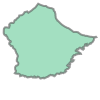

In [42]:
area

In [43]:
wrs_intersection = wrs[wrs.intersects(area)]

In [44]:
wrs_intersection

,AREA,PERIMETER,PR_,PR_ID,RINGS_OK,RINGS_NOK,WRSPR,PR,PATH,ROW,MODE,DAYCLASS,SEQUENCE,geometry
8346,2.97367,6.95566,2271,2271,1,0,146039,146039,146,39,D,5,15167,"POLYGON ((77.12486214395247 29.68847644879772,..."
8347,2.93285,6.90135,2272,2272,1,0,146040,146040,146,40,D,5,15168,"POLYGON ((76.76846483083641 28.24927605704929,..."
24591,2.93285,6.90135,2272,2272,1,0,145040,145040,145,40,D,14,47656,"POLYGON ((78.31346960811437 28.24927536443966,..."


In [45]:
paths, rows = wrs_intersection['PATH'].values, wrs_intersection['ROW'].values

In [46]:
print (paths,rows)

[146 146 145] [39 40 40]


In [67]:
xy=area.centroid.coords.xy
center = [xy[1][0],xy[0][0]]

In [68]:
center

[29.386982973933446, 78.39875601583255]

In [97]:
m = folium.Map(location=center, zoom_start=8, control_scale=True)
folium.Marker(location=center).add_to(m)
# for i, row in wrs_intersection.iterrows():
#     # Create a string for the name containing the path and row of this Polygon
#     name = 'path: %03d, row: %03d' % (row.PATH, row.ROW)
#     # Create the folium geometry of this Polygon 
#     g = folium.GeoJson(row.geometry.__geo_interface__, name=name)
#     # Add a folium Popup object with the name string
#     g.add_child(folium.Popup(name))
#     # Add the object to the map
#     g.add_to(m)

In [98]:
m

In [99]:
for i, (path, row) in enumerate(zip(paths, rows)):
    print('Image', i+1, ' - path:', path, 'row:', row)

Image 1  - path: 146 row: 39
Image 2  - path: 146 row: 40
Image 3  - path: 145 row: 40


In [103]:
s3_scenes = pd.read_csv('C:\\Users\\GOEL\\Desktop\\MTP\\data\\scene_list\\scene_list')

In [104]:
s3_scenes.head()

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
0,LC08_L1TP_149039_20170411_20170415_01_T1,LC81490392017101LGN00,2017-04-11 05:36:29.349932,0.00,L1TP,149,39,29.22165,72.41205,31.34742,74.84666,https://s3-us-west-2.amazonaws.com/landsat-pds...
1,LC08_L1TP_012001_20170411_20170415_01_T1,LC80120012017101LGN00,2017-04-11 15:14:40.001201,0.15,L1TP,12,1,79.51504,-22.06995,81.90314,-7.44339,https://s3-us-west-2.amazonaws.com/landsat-pds...
2,LC08_L1TP_012002_20170411_20170415_01_T1,LC80120022017101LGN00,2017-04-11 15:15:03.871058,0.38,L1TP,12,2,78.74882,-29.24387,81.14549,-15.04330,https://s3-us-west-2.amazonaws.com/landsat-pds...
3,LC08_L1TP_012010_20170411_20170415_01_T1,LC80120102017101LGN00,2017-04-11 15:18:14.918879,0.02,L1TP,12,10,69.67856,-56.04655,72.02949,-48.71678,https://s3-us-west-2.amazonaws.com/landsat-pds...
4,LC08_L1TP_012011_20170411_20170415_01_T1,LC80120112017101LGN00,2017-04-11 15:18:38.780265,10.65,L1TP,12,11,68.38187,-57.33186,70.76840,-51.13822,https://s3-us-west-2.amazonaws.com/landsat-pds...


In [105]:
bulk_list = []

# Iterate through paths and rows
for path, row in zip(paths, rows):

    print('Path:',path, 'Row:', row)

    # Filter the Landsat Amazon S3 table for images matching path, row, cloudcover and processing state.
    scenes = s3_scenes[(s3_scenes.path == path) & (s3_scenes.row == row) & 
                       (s3_scenes.cloudCover <= 5) & 
                       (~s3_scenes.productId.str.contains('_T2')) &
                       (~s3_scenes.productId.str.contains('_RT'))]
    print(' Found {} images\n'.format(len(scenes)))

    # If any scenes exists, select the one that have the minimum cloudCover.
    if len(scenes):
        scene = scenes.sort_values('cloudCover').iloc[0]

    # Add the selected scene to the bulk download list.
    bulk_list.append(scene)

Path: 146 Row: 39
 Found 10 images

Path: 146 Row: 40
 Found 23 images

Path: 145 Row: 40
 Found 17 images



In [106]:
bulk_frame = pd.concat(bulk_list, 1).T
bulk_frame

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
492931,LC08_L1TP_146039_20180511_20180517_01_T1,LC81460392018131LGN00,2018-05-11 05:17:30.962755,1.16,L1TP,146,39,29.2022,77.013,31.3413,79.4975,https://s3-us-west-2.amazonaws.com/landsat-pds...
726183,LC08_L1TP_146040_20130529_20170504_01_T1,LC81460402013149LGN01,2013-05-29 05:20:54.407743,0,L1TP,146,40,27.8582,76.7263,29.8648,78.991,https://s3-us-west-2.amazonaws.com/landsat-pds...
5143,LC08_L1TP_145040_20170330_20170414_01_T1,LC81450402017089LGN00,2017-03-30 05:12:15.630854,0,L1TP,145,40,27.784,78.2451,29.91,80.6477,https://s3-us-west-2.amazonaws.com/landsat-pds...


In [110]:
LANDSAT_PATH="C:\\Users\\GOEL\\Desktop\\MTP\\data"

In [111]:
import requests
from bs4 import BeautifulSoup

# For each row
for i, row in bulk_frame.iterrows():

    # Print some the product ID
    print('\n', 'EntityId:', row.productId, '\n')
    print(' Checking content: ', '\n')

    # Request the html text of the download_url from the amazon server. 
    # download_url example: https://landsat-pds.s3.amazonaws.com/c1/L8/139/045/LC08_L1TP_139045_20170304_20170316_01_T1/index.html
    response = requests.get(row.download_url)

    # If the response status code is fine (200)
    if response.status_code == 200:

        # Import the html to beautiful soup
        html = BeautifulSoup(response.content, 'html.parser')

        # Create the dir where we will put this image files.
        entity_dir = os.path.join(LANDSAT_PATH, row.productId)
        os.makedirs(entity_dir, exist_ok=True)

        # Second loop: for each band of this image that we find using the html <li> tag
        for li in html.find_all('li'):

            # Get the href tag
            file = li.find_next('a').get('href')

            print('  Downloading: {}'.format(file))

            # Download the files
            # code from: https://stackoverflow.com/a/18043472/5361345

            response = requests.get(row.download_url.replace('index.html', file), stream=True)

            with open(os.path.join(entity_dir, file), 'wb') as output:
                shutil.copyfileobj(response.raw, output)
            del response


 EntityId: LC08_L1TP_146039_20180511_20180517_01_T1 

 Checking content:  

  Downloading: LC08_L1TP_146039_20180511_20180517_01_T1_B2_wrk.IMD
  Downloading: LC08_L1TP_146039_20180511_20180517_01_T1_B1.TIF.ovr
  Downloading: LC08_L1TP_146039_20180511_20180517_01_T1_B11.TIF
  Downloading: LC08_L1TP_146039_20180511_20180517_01_T1_B8.TIF.ovr
  Downloading: LC08_L1TP_146039_20180511_20180517_01_T1_B11.TIF.ovr
  Downloading: LC08_L1TP_146039_20180511_20180517_01_T1_B11_wrk.IMD
  Downloading: LC08_L1TP_146039_20180511_20180517_01_T1_B2.TIF


ProtocolError: ('Connection broken: OSError("(10054, \'WSAECONNRESET\')",)', OSError("(10054, 'WSAECONNRESET')",))

In [113]:
from sentinelsat import SentinelAPI,read_geojson,geojson_to_wkt
from geojson import Polygon
import geojson
import tempfile
import datetime as dt 

In [115]:
api = SentinelAPI('meet.saparia','9909404659')
#coordinates = [(76.58234065478575,17.25958245029804),(76.94821117999994,17.089067089549573),(77.21592132040054,17.50654956833391),(76.74296673902613,17.617150362421967),(76.58234065478575,17.25958245029804),(76.58234065478575,17.25958245029804)]
#POLYGON())" ) AND ( beginPosition:[2017-11-11T00:00:00.000Z TO 2017-12-11T23:59:59.999Z] AND endPosition:[2017-11-11T00:00:00.000Z TO 2017-12-11T23:59:59.999Z] )

coordinates = [(76.89941158791933,17.223384891246383),(77.00050005239353,17.223384891246383),(77.00050005239353,17.276782301151),(76.89941158791933,17.276782301151),(76.89941158791933,17.223384891246383)]
#start_date = dt.date(int("2017"),int("09"),int("27"))
#end_date = dt.date(int("2017"),int("11"),int("27"))

 #footprint:"Intersects(POLYGON())") AND ( beginPosition:[2017-09-27T00:00:00.000Z TO 2017-11-27T23:59:59.999Z] AND endPosition:[2017-09-27T00:00:00.000Z TO 2017-11-27T23:59:59.999Z] ) AND (platformname:Sentinel-2)


#POLYGON())") AND ( beginPosition:[2017-09-27T00:00:00.000Z TO 2017-11-27T23:59:59.999Z] AND endPosition:[2017-09-27T00:00:00.000Z TO 2017-11-27T23:59:59.999Z] ) 



def product_list(coordinates,start_date,end_date) :
    polygon_geojson = Polygon([coordinates])
    tmp_file = tempfile.mkstemp(suffix='.geojson')
    with open(tmp_file[1], 'w') as outfile:        
        geojson.dump(polygon_geojson, outfile)
    footprint = geojson_to_wkt(read_geojson(tmp_file[1]))
    products = api.query(footprint,date=("%sT00:00:00.000Z"%(start_date),"%sT23:59:59.999Z"%(end_date)),producttype='S2MSI1C')
    return products

def download(key,start_date,end_date):
    path = 'F:/Agriculture/satellite_images/%s_%s'%(start_date,end_date)
    if not os.path.exists(path):
        os.makedirs(path)
    api.download(key,directory_path=path)
    

total_images = int("6")
monthly_gap = int("1")
count = int("1")
#title = 'S2A_MSIL1C_20171123T052131_N0206_R062_T43QFV_20171123T091125'
title = 'S2A_MSIL1C_20171123T052131_N0206_R062_T43QFV_20171123T091125'

def key_generator(title,products) :
    list_it = [(value, key) for key, value in products.items()]
    item_tuple = [items for items in list_it if items[0]['title']==title ]
    return item_tuple

    

while (count <= total_images-monthly_gap+1) :
    if count == 1 :
        start_month = int("11")
        end_month = int("12")
        start_date = dt.date(int("2017"),start_month,int("11"))
        end_date = dt.date(int("2017"),end_month,int("11"))
        products = product_list(coordinates,start_date,end_date)
        key_tuple = key_generator(title,products)
        tuple_conv = [(value, key) for key, value in key_tuple]
        conv = tuple_conv.pop()
        final_key = conv[0]
        item_dict = conv[1]['tileid']
        item_pltid = conv[1]['platformserialidentifier']
        item_title = conv[1]['title']
        item_title_wrd = item_title.split("_")
        bfr_tid = item_title_wrd[4]
        if not os.path.exists('F:/Agriculture/satellite_images/%s_%s/%s.zip'%(start_date,end_date,item_title)):
            download(final_key,start_date,end_date)
        count = count + 1
    else :
        end_month = start_month
        start_month = end_month - monthly_gap
        start_date = dt.date(int("2017"),start_month,int("11"))
        end_date = dt.date(int("2017"),end_month,int("11"))
        products = product_list(coordinates,start_date,end_date)
        total_len = len(products) 
        a_dict = {}
        while (total_len > 0) :
            item1 = products.popitem()
            item_key = item1[1]['uuid']
            item_title1 = item1[1]['title']
            try : 
                item_dict1 = item1[1]['tileid']
            except :
                SyntaxError 
            else:
                item_dict1 = item_title1.split('_')[5].split('T')[1]
            item_pltid1 = item1[1]['platformserialidentifier']
            item_title1_wrd = item_title1.split("_")
            bfr_tid1 = item_title1_wrd[4]
            itm_date1 = item_title1_wrd[6]
            int_date = int(item_title1_wrd[6].split("T")[0])
            if (item_dict1 == item_dict) & (item_pltid == item_pltid1) & (bfr_tid1==bfr_tid) :
                a_dict[item_key] = int_date
            total_len = total_len - 1
        if len(a_dict) == 1 :
            if not os.path.exists('F:/Agriculture/satellite_images/%s_%s/%s.zip'%(start_date,end_date,item_title1)):
                download(a_dict.popitem()[0],start_date,end_date)
        else :
            list_itms = [(value, key) for key, value in a_dict.items()]
            if not os.path.exists('F:/Agriculture/satellite_images/%s_%s/%s.zip'%(start_date,end_date,item_title1)):
                download(max(list_itms)[1],start_date,end_date)
        count = count + 1
    
    
    

total_images = int("6")
monthly_gap = int("1")
count = int("1")
#title = 'S2A_MSIL1C_20171123T052131_N0206_R062_T43QFV_20171123T091125'
title = 'S2A_OPER_PRD_MSIL1C_PDMC_20161128T133732_R062_V20161128T052152_20161128T052152'


while (count <= total_images-monthly_gap+1) :
    if count == 1 :
        start_month = int("11")
        end_month = int("12")
        start_date = dt.date(int("2016"),start_month,int("11"))
        end_date = dt.date(int("2016"),end_month,int("11"))
        products = product_list(coordinates,start_date,end_date)
        key_tuple = key_generator(title,products)
        tuple_conv = [(value, key) for key, value in key_tuple]
        conv = tuple_conv.pop()
        final_key = conv[0]
        item_pltid = conv[1]['platformserialidentifier']
        item_title = conv[1]['title']
        item_title_wrd = item_title.split("_")
        bfr_tid = item_title_wrd[4]
        if not os.path.exists('F:/Agriculture/satellite_images/%s_%s/%s.zip'%(start_date,end_date,item_title)):
            download(final_key,start_date,end_date)
        count = count + 1
    else :
        end_month = start_month
        start_month = end_month - monthly_gap
        start_date = dt.date(int("2016"),start_month,int("11"))
        end_date = dt.date(int("2016"),end_month,int("11"))
        products = product_list(coordinates,start_date,end_date)
        total_len = len(products) 
        a_dict = {}
        while (total_len > 0) :
            item1 = products.popitem()
            item_key = item1[1]['uuid']
            item_title1 = item1[1]['title']
            item_pltid1 = item1[1]['platformserialidentifier']
            item_title1_wrd = item_title1.split("_")
            bfr_tid1 = item_title1_wrd[4]
            itm_date1 = item_title1_wrd[6]
            int_date = int(item_title1_wrd[5].split("T")[0])
            if (item_pltid == item_pltid1) & (bfr_tid1==bfr_tid) :
                a_dict[item_key] = int_date
            total_len = total_len - 1
        if len(a_dict) == 1 :
            if not os.path.exists('F:/Agriculture/satellite_images/%s_%s/%s.zip'%(start_date,end_date,item_title1)):
                download(a_dict.popitem()[0],start_date,end_date)
        else :
            list_itms = [(value, key) for key, value in a_dict.items()]
            if not os.path.exists('F:/Agriculture/satellite_images/%s_%s/%s.zip'%(start_date,end_date,item_title1)):
                download(max(list_itms)[1],start_date,end_date)
        count = count + 1

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:/'

In [124]:
import numpy as np
year =2015


In [128]:
validate = np.nonzero(year == 2014)[0]

In [126]:
validate


array([], dtype=int64)

In [135]:
# file =open('LANDSAT_8_C1_289207.txt','r')
df=pd.read_csv("meta.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 2: invalid start byte